## Numpy

In [3]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [6]:
import random
import time

array_size = 10000

start = time.time()
std_array = [random.randint(0, 100) for _ in range(array_size)]
std_array = [x + 1 for x in std_array]
stop = time.time()
print(f'Czas bez numpy: {(stop - start) * 1000} ms')

start = time.time()
np_array = np.random.randint(100, size=array_size)
np_array += 1
stop = time.time()
print(f'Czas z numpy: {(stop - start) * 1000} ms')

Czas bez numpy: 7.437944412231445 ms
Czas z numpy: 0.4668235778808594 ms


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [11]:
from math import sin, cos, pi

start = time.time()
random_list = [random.uniform(0, 2 * pi) for _ in range(array_size)]
result = [sin(x) + cos(x) for x in random_list]
stop = time.time()
print(f'Czas bez numpy: {(stop - start) * 1000} ms')

start = time.time()
random_array_np = np.random.uniform(0, 2 * np.pi, size=array_size)
result_np = np.sin(random_array_np) + np.cos(random_array_np)
stop = time.time()
print(f'Czas z numpy: {(stop - start) * 1000} ms')

Czas bez numpy: 5.272150039672852 ms
Czas z numpy: 1.4986991882324219 ms


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [64]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def np_cube_sum(x):
    return np.sum(np.power(np.array(x), 3))

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

def np_almost_variance(x):
    array = np.array(x)
    means = array.mean()
    return np.sum(np.power(array - means, 4)) / len(x)

random_list = [random.uniform(0, 200) for _ in range(10000)]

start = time.time()
result = cube_sum(random_list)
stop = time.time()
print(f'Czas bez numpy: {(stop - start) * 1000} ms')

start = time.time()
result_np = np_cube_sum(random_list)
stop = time.time()
print(f'Czas z numpy: {(stop - start) * 1000} ms')

print()

start = time.time()
result = almost_variance(random_list)
stop = time.time()
print(f'Czas bez numpy: {(stop - start) * 1000} ms')

start = time.time()
result_np = np_almost_variance(random_list)
stop = time.time()
print(f'Czas z numpy: {(stop - start) * 1000} ms')

Czas bez numpy: 0.5204677581787109 ms
Czas z numpy: 0.5109310150146484 ms

Czas bez numpy: 0.6735324859619141 ms
Czas z numpy: 0.6477832794189453 ms


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [28]:
tmp = np.arange(1, 11)
A = tmp.reshape(10, 1) * tmp
print(A)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [63]:
array = np.random.rand(10, 5)
diffs = array[:, np.newaxis, :] - array[np.newaxis, :, :]
print(np.sum(np.power(diffs, 2), axis = 2))

[[0.         1.90062055 1.96985499 0.83669051 0.31706774 1.00380098
  0.85818102 0.13425959 0.52269186 0.90611029]
 [1.90062055 0.         0.27863347 0.40430267 0.77348503 0.57406236
  0.33654345 1.43467049 1.53675848 0.79612793]
 [1.96985499 0.27863347 0.         0.69949114 0.94246674 0.62075929
  0.26911997 1.34647309 1.15793468 1.1356248 ]
 [0.83669051 0.40430267 0.69949114 0.         0.33764359 0.41596816
  0.18860829 0.60878559 1.08978486 0.4546924 ]
 [0.31706774 0.77348503 0.94246674 0.33764359 0.         0.3298172
  0.31930403 0.29801781 0.47672952 0.63057373]
 [1.00380098 0.57406236 0.62075929 0.41596816 0.3298172  0.
  0.33610607 0.70995855 0.63303692 0.78696797]
 [0.85818102 0.33654345 0.26911997 0.18860829 0.31930403 0.33610607
  0.         0.46739665 0.59794248 0.44533843]
 [0.13425959 1.43467049 1.34647309 0.60878559 0.29801781 0.70995855
  0.46739665 0.         0.24693406 0.50833124]
 [0.52269186 1.53675848 1.15793468 1.08978486 0.47672952 0.63303692
  0.59794248 0.246934

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [82]:
def fun(x):
    array = np.array(x)
    means = array.mean(axis=0)
    stds = array.std(axis=0)
    return (array - means) / stds

a = [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]
print(fun(a))

[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [93]:
def closest(x, A):
    np_A = np.array(A).flatten()
    diffs = np.abs(x - np_A)
    return np_A[np.argmin(diffs)]

print(closest(1.5, [1, -4.3]))
print(closest(-2, [1, -4.3]))
print(closest(-2, [[1, -4.3], [-1, -4.3]]))

1.0
-4.3
-1.0


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [106]:
def fun(x, a_array):
    return np.sum(np.cumprod(np.append(1, np.full(len(a_array) - 1, x))) * a_array)
  
# 1 + 2 * 2 + 3 * 4
print(fun(2, [1, 2, 3]))
print(fun(2, [1, 2, 3]) == np.poly1d([3, 2, 1])(2))

17
True


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

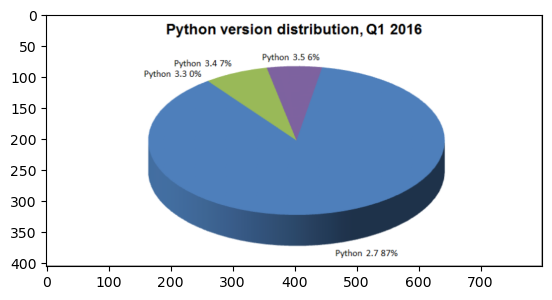

In [31]:
img = mpimg.imread('images/pie.png')
plt.imshow(img);

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

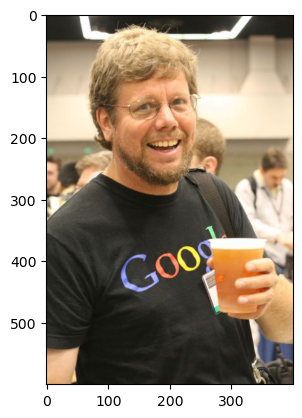

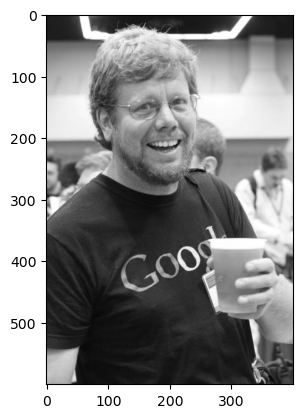

In [45]:
def convert_to_grayscale(image):
    height, width, _ = image.shape
    grayscale_image = np.zeros((height, width))
    for row in range(height):
        for column in range(width):
            red, green, blue = image[row, column]
            grayscale_image[row, column] = 0.2126 * red + 0.7152 * green + 0.0722 * blue
    return grayscale_image

image = mpimg.imread('images/Guido_van_Rossum.jpg')
plt.imshow(image)
plt.show()

grayscale_image = convert_to_grayscale(image)
plt.imshow(grayscale_image, cmap='gray')
plt.show()

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [51]:
x1 = np.array([1, 2, 3])
x2 = np.array([4, 5, 6])
lambdas = np.linspace(0, 1, 10).reshape(10, 1)
print(nplambdas * x1 + (1 - lambdas) * x2)

[[4.         5.         6.        ]
 [3.66666667 4.66666667 5.66666667]
 [3.33333333 4.33333333 5.33333333]
 [3.         4.         5.        ]
 [2.66666667 3.66666667 4.66666667]
 [2.33333333 3.33333333 4.33333333]
 [2.         3.         4.        ]
 [1.66666667 2.66666667 3.66666667]
 [1.33333333 2.33333333 3.33333333]
 [1.         2.         3.        ]]
